In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [2]:
df = pd.read_csv('kc_house_data.csv')

# EDA

In [3]:
#Checking if we have any missing data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.info() #21597

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<Figure size 1500x1000 with 0 Axes>

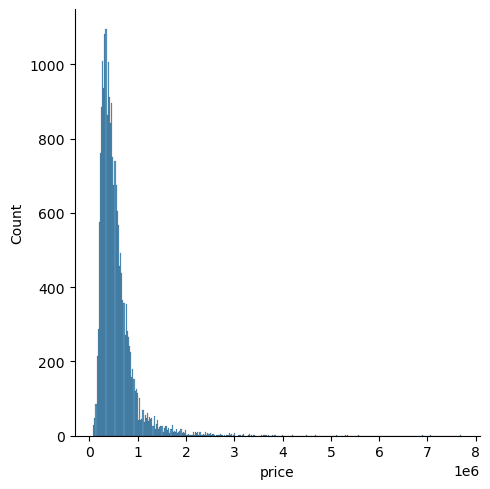

In [6]:
plt.figure(figsize=(15,10))
sns.displot(df['price'])

<Figure size 1000x800 with 0 Axes>

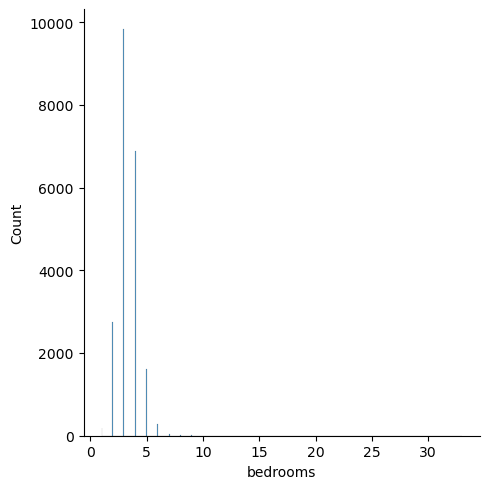

In [7]:
plt.figure(figsize=(10,8))
sns.displot(df['bedrooms'])

Checking Correlations

In [8]:
df.corr()['price'].sort_values()

/var/folders/cg/vf981v4x5tz8b5szmpt19_xm0000gp/T/ipykernel_1436/321850276.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

Plot the features with the highest correlation

<Figure size 600x800 with 0 Axes>

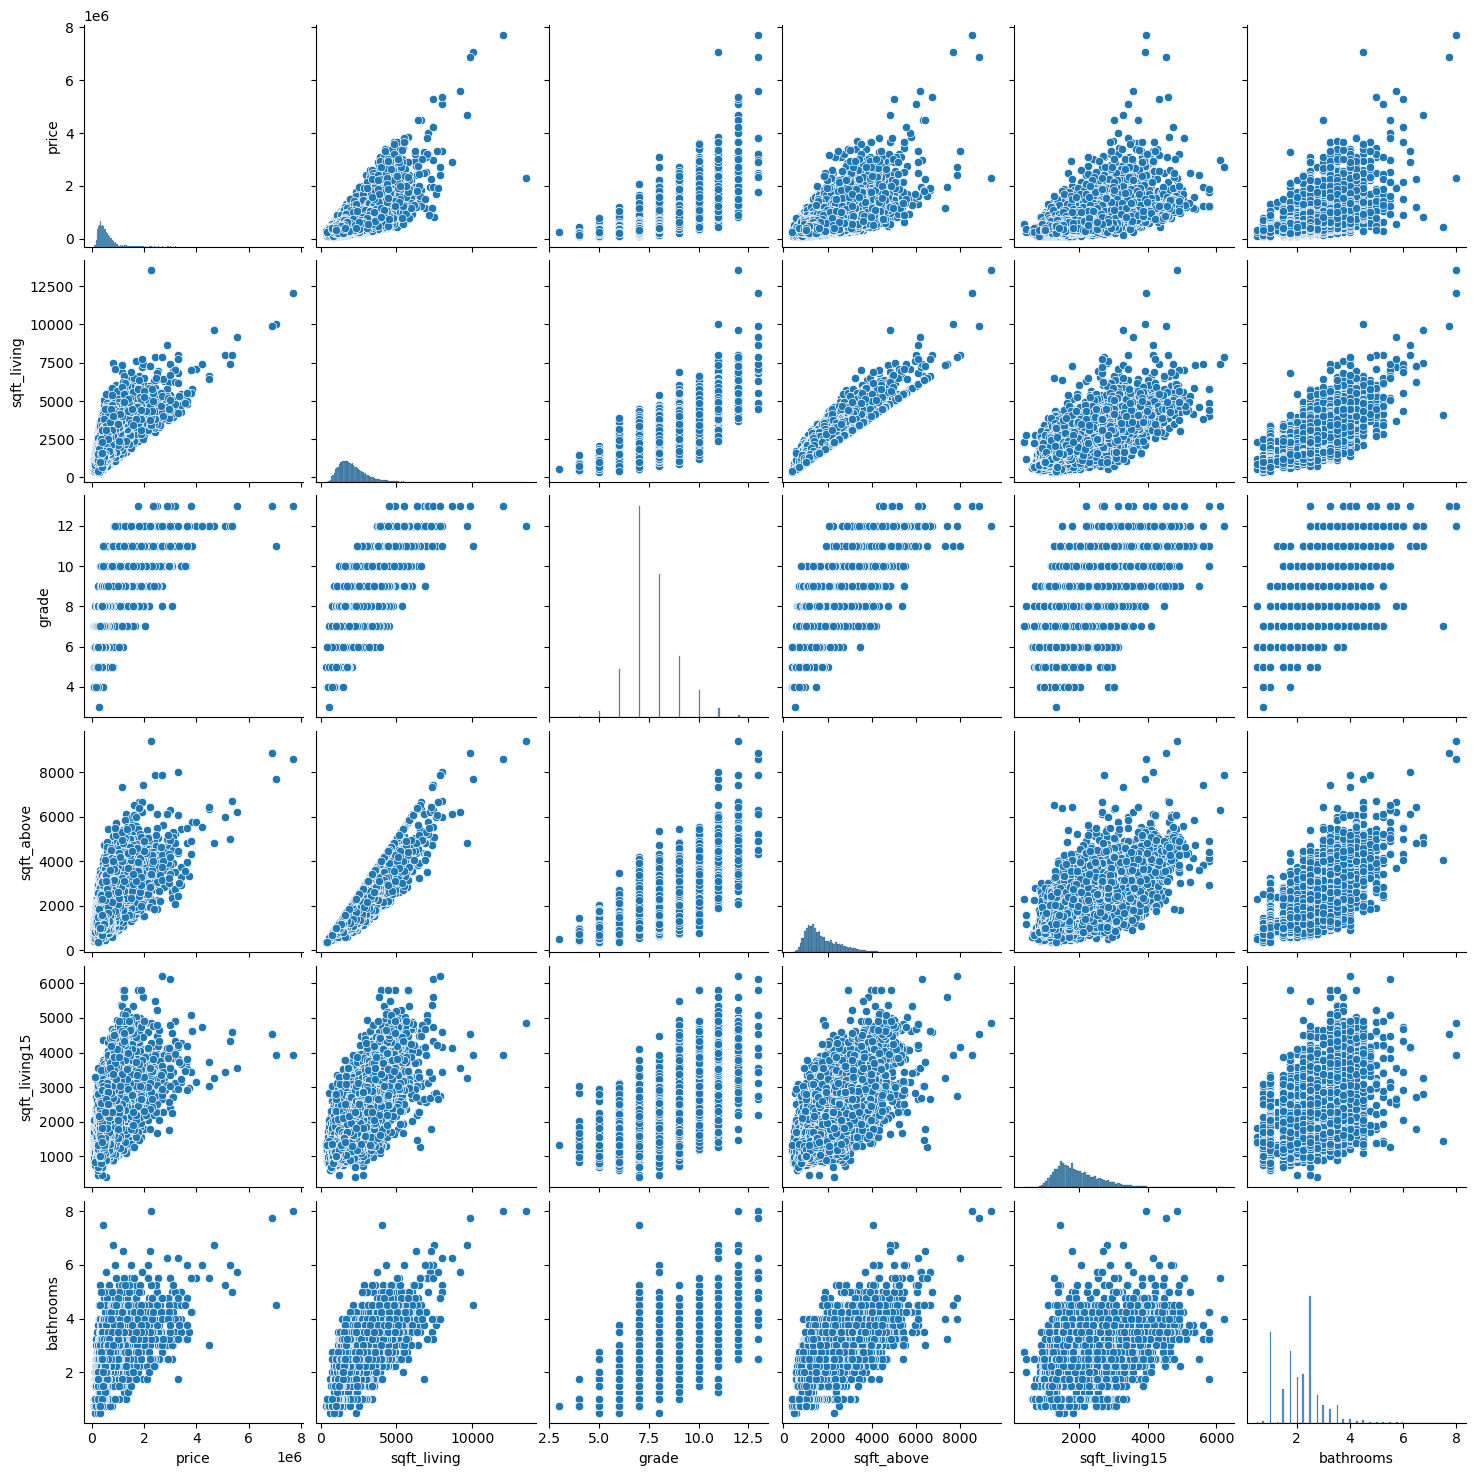

In [9]:
plt.figure(figsize=(6,8))
sns.pairplot(df,vars=['price','sqft_living','grade','sqft_above','sqft_living15','bathrooms'])

<Axes: xlabel='bedrooms', ylabel='price'>

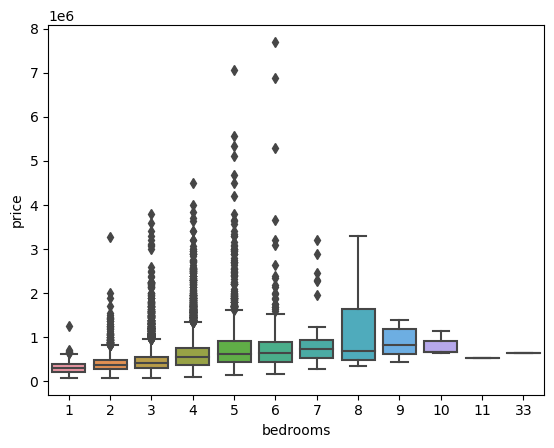

In [10]:
#There is a lot of variance for houses with bedrooms from 3 to 7
sns.boxplot(data=df, x='bedrooms', y = 'price')

<Axes: xlabel='price', ylabel='long'>

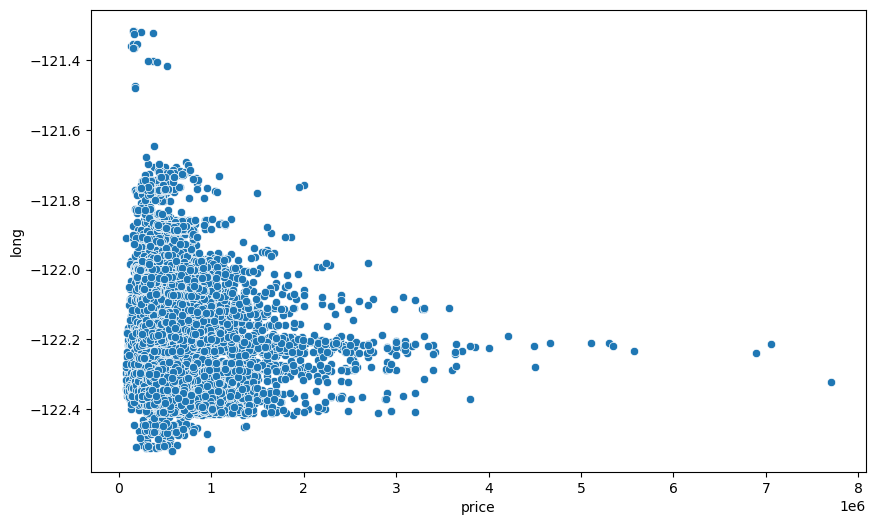

In [11]:
#There is specific distribution around the -122.2 lat
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price',y='long')

<Axes: xlabel='price', ylabel='lat'>

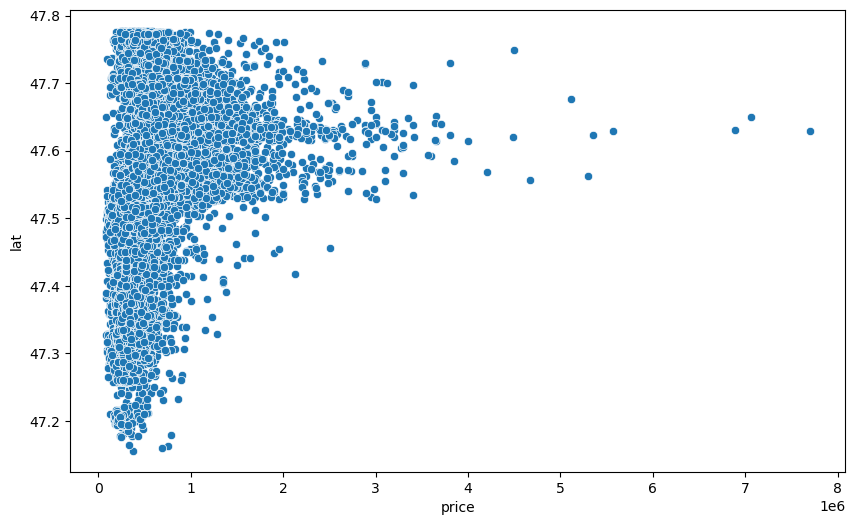

In [12]:
#There is specific distribution around the 47 loong
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price',y='lat')

<Axes: xlabel='long', ylabel='lat'>

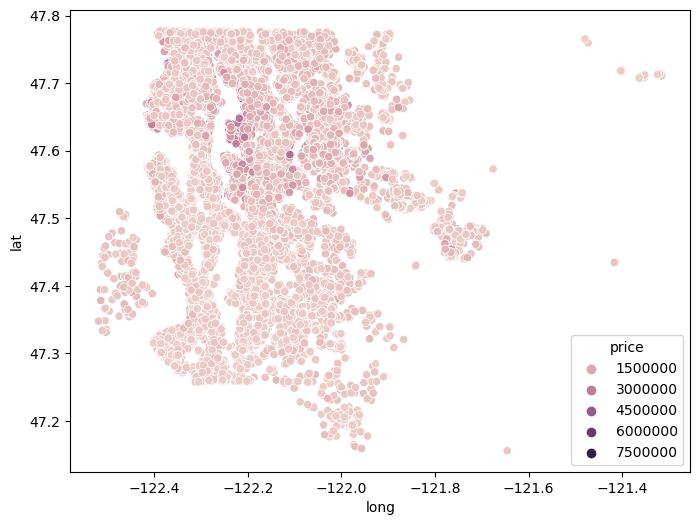

In [39]:
#This actually seems like the map of seattle
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='long', y='lat',hue='price')
#The expensive houses are around the (-122,47)

I want to exlude the to 1% 

In [13]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [14]:
#Create a new column quantile
df['quantile'] = df['price'].rank(pct=True)

In [15]:
#df_99_perc = 
df_no_top_99_per = df[df['quantile']<= 0.99]
df_no_top_99_per.sort_values('price',ascending=False) #this is 216 rows smaller than the original

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,quantile
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560,0.989883
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,4430,0,1998,0,98005,47.6422,-122.157,3900,35237,0.989883
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486,0.989883
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868,0.989883
556,5486800070,6/20/2014,1950000.0,7,3.50,4640,15235,2.0,0,1,...,2860,1780,1965,2003,98040,47.5666,-122.231,3230,20697,0.989605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,520,0,1951,0,98168,47.4799,-122.296,1572,10570,0.000232
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,860,0,1954,0,98146,47.4987,-122.341,1140,11250,0.000185
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,730,0,1943,0,98168,47.4808,-122.315,860,9000,0.000139
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,430,0,1912,0,98014,47.6499,-121.909,1200,7500,0.000093


<Axes: xlabel='long', ylabel='lat'>

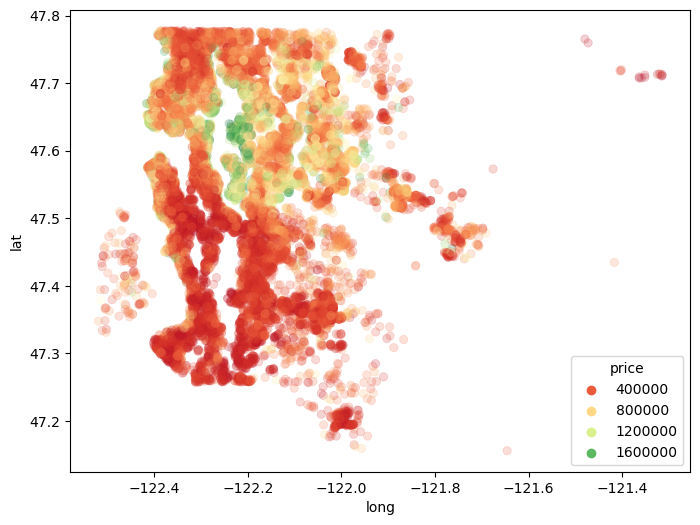

In [16]:
#This actually seems like the map of seattle
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_no_top_99_per, x='long', y='lat',hue='price',edgecolor=None, alpha=0.2,palette='RdYlGn')
#The expensive houses are around the (-122,47)
# We now see more clear which is the area with most expensive house. Those houses seem like they are close to the waterfront

<Axes: xlabel='waterfront', ylabel='price'>

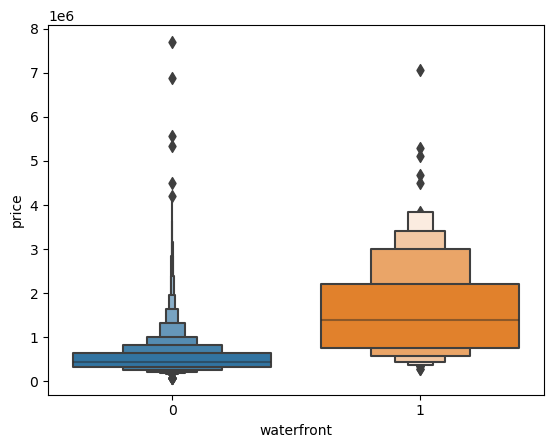

In [44]:
sns.boxenplot(data=df,x='waterfront',y='price')

# First Model

## Feature Engineering

In [17]:
df.head()
df = df.drop('id',axis=1) #the ID columns doesn't mean anything

In [18]:
df['date'] = pd.to_datetime(df['date'])

In [19]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)
# def year_extraction(date):
#    return date.year

In [20]:
df.drop('date', axis=1, inplace=True)

<Axes: xlabel='month'>

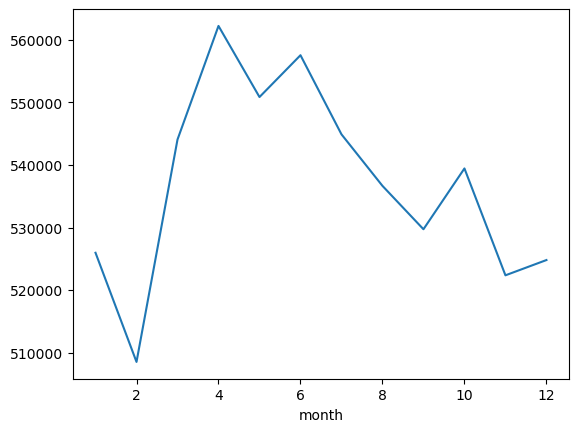

In [21]:
#Not a very huge behaviour throughout the different months
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

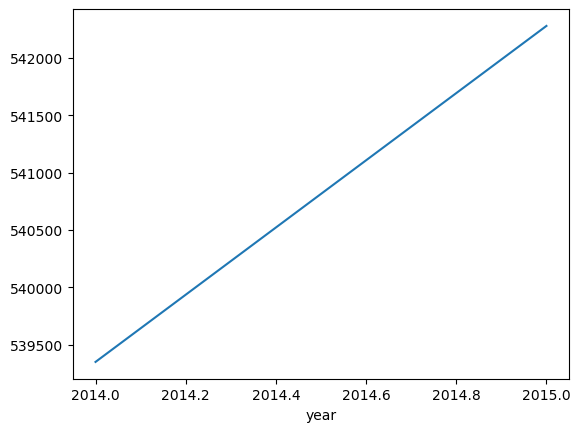

In [22]:
df.groupby('year').mean()['price'].plot()

Drop the ZipCode column as its hard to make sense and too many unique value to make them dummy

In [57]:
#70 unique zipcode
df['zipcode'].value_counts()
df = df.drop('zipcode',axis=1)

In [58]:
df['yr_renovated'].value_counts()
#Year of rennovation is positevly correlated with the price, hence we leave it as is

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [59]:
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

## Create Model

Separete our features from our label

In [139]:
# Convert Pandas dataframe to Numpy arrays becasue this is what Keras accepts
X = df.drop('price', axis=1).values # adding ".values" returns a numpy array
y = df['price'].values

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Normalizing/Scaling the Data

We scale the feature data. We do that because ANN are using weights and bieases, hence large values cause errors with the weights.

In [142]:
from sklearn.preprocessing import MinMaxScaler

In [143]:
scaler = MinMaxScaler()

In [312]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set
# We first fit the data and then we actually transform it
scaler.fit(X_train)

MinMaxScaler()

In [313]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [148]:
# We want to base our number of layer based on the number of features we have
X_train.shape

(15117, 20)

In [276]:
model = Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))

# Final output node for prediction -> We need to have a single output since we want to predict the price, for this reason Dense(1)
model.add(Dense(1))

# We choose "adam" as optimizer as seems like perfom the best according to documentation
model.compile(optimizer = 'adam', loss = 'mse')

In [277]:
# we are training our model on X_train and y_train but also we are validating the fit based on test data
# batc_size needs to be in power of two. The smaller the batch_size the longer the training will take, but the less the training will overfit the data
model.fit(x=X_train, y=y_train,validation_data = (X_test,y_test), batch_size = 128, epochs = 400)

Epoch 1/400
119/119 [==============================] - 1s 2ms/step - loss: 430220935168.0000 - val_loss: 418808233984.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 427805802496.0000 - val_loss: 410532675584.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 394987110400.0000 - val_loss: 337474813952.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 258983821312.0000 - val_loss: 153727483904.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 110596325376.0000 - val_loss: 87285219328.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 88957042688.0000 - val_loss: 84877869056.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 86448095232.0000 - val_loss: 82524905472.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 84011671552.0000 - val_loss: 80273768448.0000
Epoch 9/400
119/119 [==

## Evaluate our model

In [151]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,4.302468e+11,4.189571e+11
1,4.298264e+11,4.175239e+11
2,4.240475e+11,4.041294e+11
3,3.931807e+11,3.500997e+11
4,3.068170e+11,2.339742e+11
...,...,...
395,9.582107e+09,8.830981e+09
396,9.530172e+09,8.778713e+09
397,9.519259e+09,8.778407e+09
398,9.453095e+09,8.722265e+09


<Axes: >

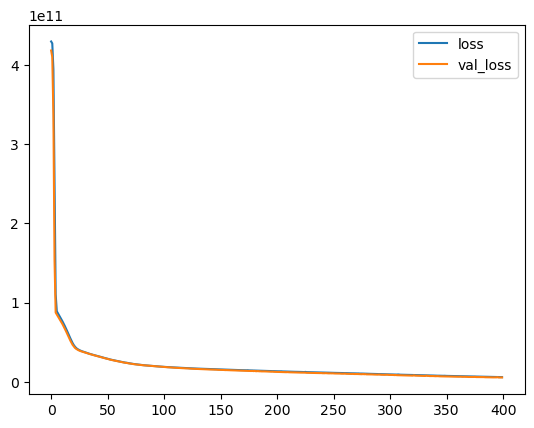

In [278]:
# IF we would see the orange line increasing after some point, then this would be an indication of overfitting and would lead to a higer loss on the test data
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [153]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [338]:
prediction = model.predict(X_test)
prediction

203/203 [==============================] - 0s 753us/step


array([[ 317991.97],
       [ 472761.66],
       [ 491542.16],
       ...,
       [ 422170.84],
       [ 434602.25],
       [1248760.2 ]], dtype=float32)

In [339]:
mean_squared_error(y_test,prediction)

5190442114.39499

In [340]:
#Our prediction on price are on average plus minus 18.3K dollars
mean_absolute_error(y_test,prediction) 

18396.074576822917

In [282]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [283]:
explained_variance_score(y_test, prediction)
# R^2 = 0.9608934129582696

0.9608934129582696

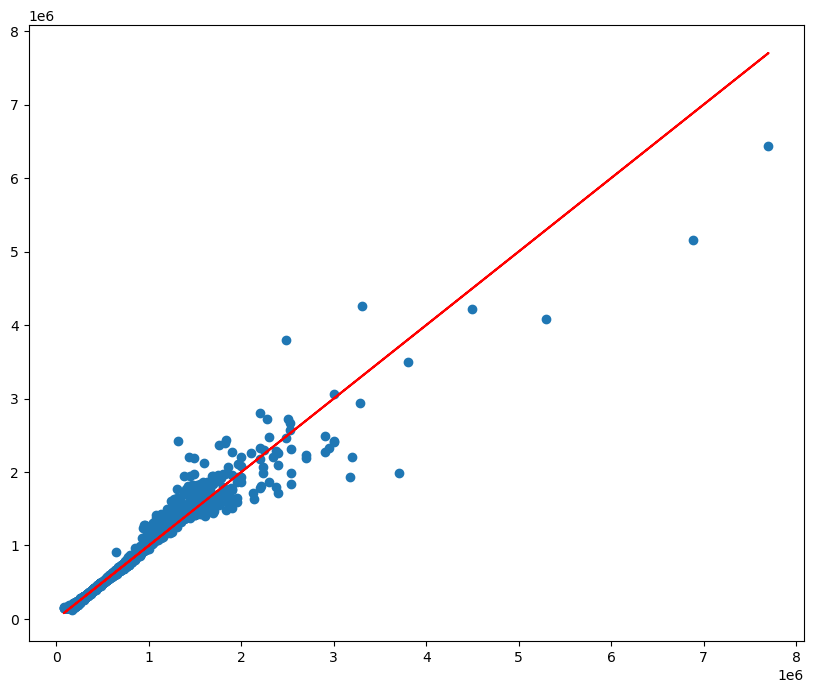

In [341]:
#From the figure below we see that our model performes well on houses with price less than 3.3M. We could further improve the predictability of our model if we would exlude houses that are costing more than 3.3M
plt.figure(figsize=(10,8))
plt.scatter(y_test,prediction)
plt.plot(y_test,y_test,'r')

Retrain the model on houses that cost less than 3.3M

# Second Model

## Feature Engineering

In [25]:
df_99 = df_99.drop('id',axis=1) #the ID columns doesn't mean anything

In [26]:
# Convert date to datetime
df_99['date'] = pd.to_datetime(df_99['date'])

In [30]:
df_99['year'] = df_99['date'].apply(lambda date: date.year)
df_99['month'] = df_99['date'].apply(lambda date: date.month)

In [32]:
df_99.drop('date', axis=1, inplace=True)

<Axes: xlabel='month'>

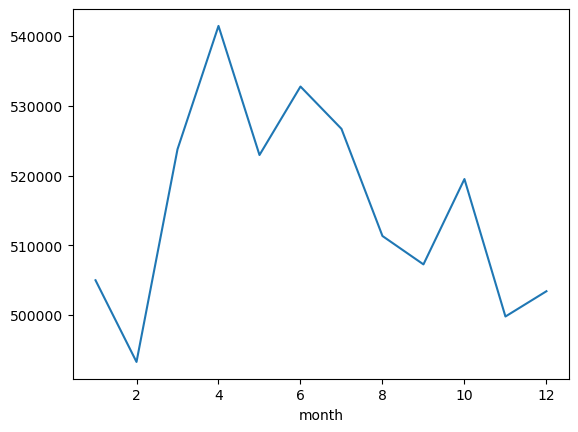

In [33]:
#Not a very huge behaviour throughout the different months
df_99.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

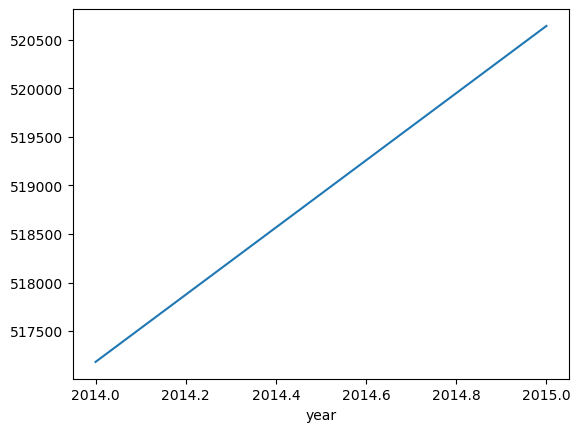

In [34]:
df_99.groupby('year').mean()['price'].plot()

Drop the ZipCode column as its hard to make sense and too many unique value to make them dummy

In [37]:
df_99.drop('zipcode',axis=1, inplace=True)

In [39]:
df_99['yr_renovated'].value_counts()
#Year of rennovation is positevly correlated with the price, hence we leave it as is

0       20498
2014       91
2013       36
2007       34
2003       34
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [40]:
df_99['sqft_basement'].value_counts()

0       13052
600       219
700       214
500       214
800       205
        ...  
2720        1
518         1
374         1
784         1
248         1
Name: sqft_basement, Length: 292, dtype: int64

## Create Model

Separete our features from our label

In [41]:
# Convert Pandas dataframe to Numpy arrays becasue this is what Keras accepts
X = df_99.drop('price', axis=1).values # adding ".values" returns a numpy array
y = df_99['price'].values

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Normalizing/Scaling the Data

We scale the feature data. We do that because ANN are using weights and bieases, hence large values cause errors with the weights.

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

In [47]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set
# We first fit the data and then we actually transform it
scaler.fit(X_train)

MinMaxScaler()

In [48]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2023-06-25 08:58:50.020647: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [51]:
X_train.shape

(14966, 20)

In [52]:
model = Sequential()

model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))

# Final output node for prediction -> We need to have a single output since we want to predict the price, for this reason Dense(1)
model.add(Dense(1))

# We choose "adam" as optimizer as seems like perfom the best according to documentation
model.compile(optimizer = 'adam', loss = 'mse')

2023-06-25 09:00:09.105382: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [53]:
# we are training our model on X_train and y_train but also we are validating the fit based on test data
# batc_size needs to be in power of two. The smaller the batch_size the longer the training will take, but the less the training will overfit the data
model.fit(x=X_train, y=y_train,validation_data = (X_test,y_test), batch_size = 128, epochs = 400)

Epoch 1/400
117/117 [==============================] - 1s 3ms/step - loss: 350374592512.0000 - val_loss: 348178317312.0000
Epoch 2/400
117/117 [==============================] - 0s 2ms/step - loss: 349757505536.0000 - val_loss: 345906774016.0000
Epoch 3/400
117/117 [==============================] - 0s 1ms/step - loss: 339441909760.0000 - val_loss: 321139769344.0000
Epoch 4/400
117/117 [==============================] - 0s 1ms/step - loss: 283213168640.0000 - val_loss: 225648279552.0000
Epoch 5/400
117/117 [==============================] - 0s 1ms/step - loss: 154014973952.0000 - val_loss: 85857886208.0000
Epoch 6/400
117/117 [==============================] - 0s 1ms/step - loss: 58472116224.0000 - val_loss: 47318523904.0000
Epoch 7/400
117/117 [==============================] - 0s 1ms/step - loss: 46128930816.0000 - val_loss: 45743161344.0000
Epoch 8/400
117/117 [==============================] - 0s 1ms/step - loss: 44926554112.0000 - val_loss: 44581781504.0000
Epoch 9/400
117/117 [==

## Evaluate our model

In [54]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,3.503746e+11,3.481783e+11
1,3.497575e+11,3.459068e+11
2,3.394419e+11,3.211398e+11
3,2.832132e+11,2.256483e+11
4,1.540150e+11,8.585789e+10
...,...,...
395,2.185654e+08,2.250924e+08
396,2.033701e+08,2.174289e+08
397,1.971138e+08,2.450631e+08
398,1.935436e+08,2.014551e+08


<Axes: >

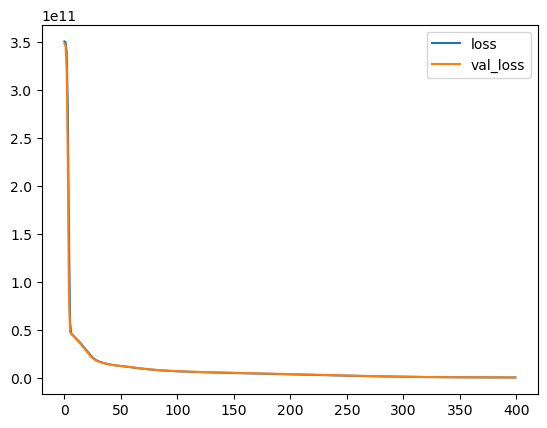

In [55]:
# IF we would see the orange line increasing after some point, then this would be an indication of overfitting and would lead to a higer loss on the test data
loss_df_99 = pd.DataFrame(model.history.history)
loss_df_99.plot()

In [56]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [57]:
prediction = model.predict(X_test)
prediction

201/201 [==============================] - 0s 531us/step


array([[320364.88],
       [744899.6 ],
       [564409.56],
       ...,
       [484231.38],
       [239732.9 ],
       [341464.78]], dtype=float32)

In [59]:
mean_squared_error(y_test,prediction)

216313855.7538094

In [60]:
#Our prediction on price are on average plus minus 7.7K dollars
mean_absolute_error(y_test,prediction) 

7702.465775549579

In [62]:
explained_variance_score(y_test, prediction)
#R^2=0.9975572773356307

0.9975572773356307

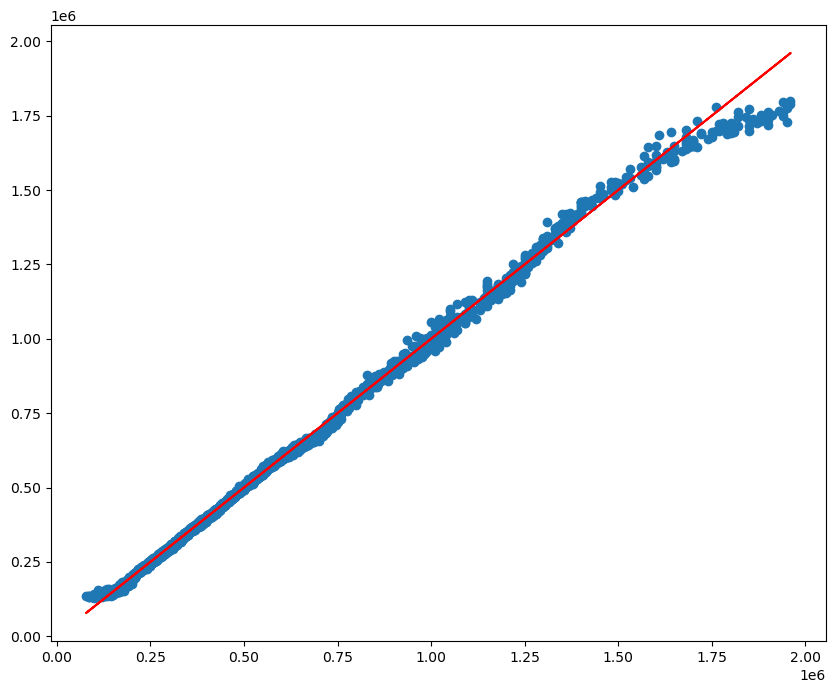

In [65]:
#From the figure below we see that our model performes well on houses with price less than 1.8M. We could further improve the predictability of our model if we would exlude houses that are costing more than 2M
plt.figure(figsize=(10,8))
plt.scatter(y_test, prediction)
plt.plot(y_test,y_test,'r')

# Lets use our model to predict - This part is not working

In [89]:
data = df_99.iloc[900]

new_house = df_99.drop('price', axis=1).iloc[900]

In [90]:
new_house

bedrooms            4.000000
bathrooms           1.750000
sqft_living      2100.000000
sqft_lot         7135.000000
floors              1.000000
waterfront          0.000000
view                0.000000
condition           4.000000
grade               7.000000
sqft_above       1050.000000
sqft_basement    1050.000000
yr_built         1955.000000
yr_renovated        0.000000
lat                47.535300
long             -122.349000
sqft_living15    1730.000000
sqft_lot15       4000.000000
quantile            0.373339
year             2014.000000
month               9.000000
Name: 912, dtype: float64

Our model is trained on scaled data, hence we need to scaled the input data

In [91]:
single_house = scaler.transform(new_house.values.reshape(-1,20))

In [92]:
single_house.max()

0.75

### Predict the price

In [93]:
model.predict(single_house)

1/1 [==============================] - 0s 21ms/step


array([[381292.6]], dtype=float32)

In [88]:
df_99.iloc[900]

price            384000.000000
bedrooms              4.000000
bathrooms             1.750000
sqft_living        2100.000000
sqft_lot           7135.000000
floors                1.000000
waterfront            0.000000
view                  0.000000
condition             4.000000
grade                 7.000000
sqft_above         1050.000000
sqft_basement      1050.000000
yr_built           1955.000000
yr_renovated          0.000000
lat                  47.535300
long               -122.349000
sqft_living15      1730.000000
sqft_lot15         4000.000000
quantile              0.373339
year               2014.000000
month                 9.000000
Name: 912, dtype: float64

The Price prediction from the model is: 381.292$ while the actual price from the house was 384.000$

The second model if we look at the R^2, MAE and the actual predictions seems like it's performing better than the first one.